In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#  Define directories
DATA_DIR = "../data/"
PLOTS_DIR = "../plots/"

In [ ]:
#  Ensure plots directory exists
os.makedirs(PLOTS_DIR, exist_ok=True)


In [24]:
# Load datasets
df_train = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
df_test = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))


In [25]:
df_train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [26]:
# Overview of the data
print("Train Data Shape:", df_train.shape)
print("Test Data Shape:", df_test.shape)


Train Data Shape: (150150, 9)
Test Data Shape: (13860, 8)


In [27]:
print("\n Train Data Info:")
print(df_train.info())



 Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB
None


In [28]:

print("\nTest Data Info:")
print(df_test.info())


Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        13860 non-null  int64  
 1   week             13860 non-null  object 
 2   store_id         13860 non-null  int64  
 3   sku_id           13860 non-null  int64  
 4   total_price      13860 non-null  float64
 5   base_price       13860 non-null  float64
 6   is_featured_sku  13860 non-null  int64  
 7   is_display_sku   13860 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 866.4+ KB
None


In [29]:
print("\n Summary Statistics (Train Data):")
display(df_train.describe())


 Summary Statistics (Train Data):


,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [30]:
print("\n Summary Statistics (Test Data):")
display(df_test.describe())


 Summary Statistics (Test Data):


,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
count,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000
mean,222460.146392,9199.422511,254761.132468,212.188874,223.922660,0.086580,0.133333
std,5668.258490,615.611603,85550.107852,93.138162,103.429522,0.281229,0.339947
min,212645.000000,8023.000000,216233.000000,65.550000,70.537500,0.000000,0.000000
25%,217557.750000,8562.000000,217217.000000,132.525000,137.512500,0.000000,0.000000
50%,222466.500000,9371.000000,222087.000000,213.037500,218.737500,0.000000,0.000000
75%,227367.250000,9731.000000,245338.000000,241.537500,261.487500,0.000000,0.000000
max,232287.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000


In [31]:

# 📉 Check for missing values
print("\n Missing Values in Train Data:")
print(df_train.isnull().sum())



 Missing Values in Train Data:
record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64


In [32]:

print("\n Missing Values in Test Data:")
print(df_test.isnull().sum())



 Missing Values in Test Data:
record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64


In [33]:
df_train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [34]:
df_train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [35]:
# ✅ Check actual column types
print("\n Column Data Types:")
print(df_train.dtypes)



 Column Data Types:
record_ID            int64
week                object
store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
units_sold           int64
dtype: object


In [37]:
numeric_columns = df_train.select_dtypes(include=['number']).columns.tolist()

In [38]:
print("\n Numeric Columns Selected:", numeric_columns)


 Numeric Columns Selected: ['record_ID', 'store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku', 'units_sold']


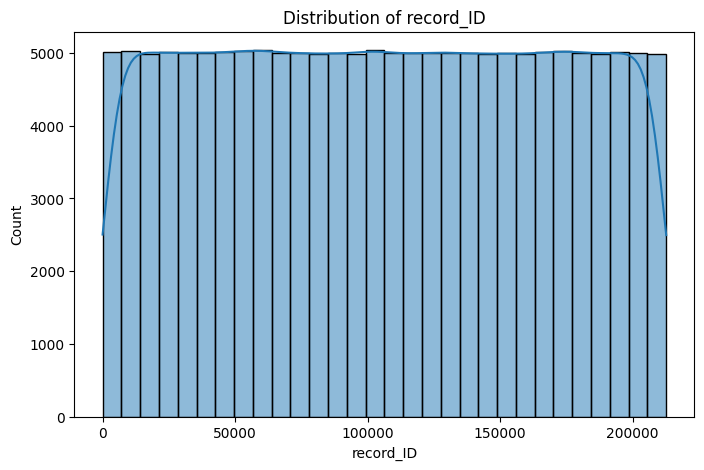

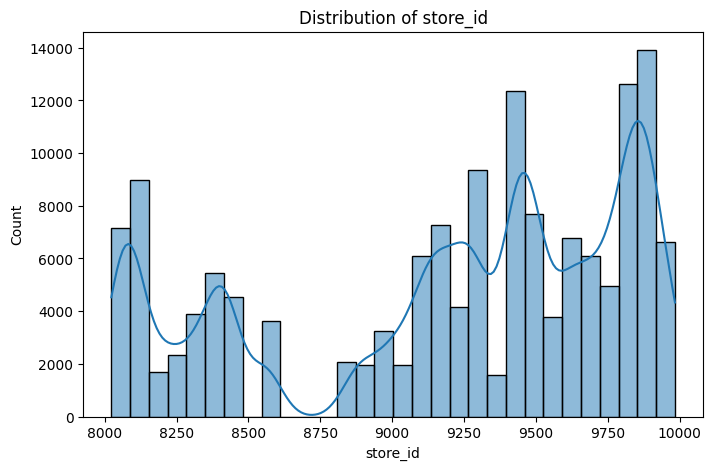

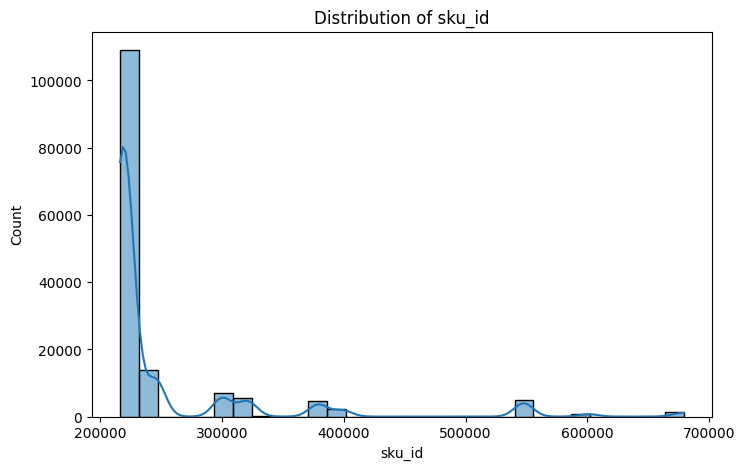

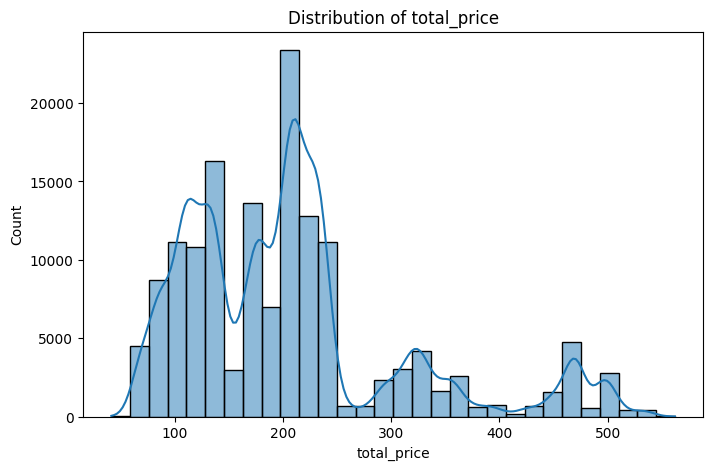

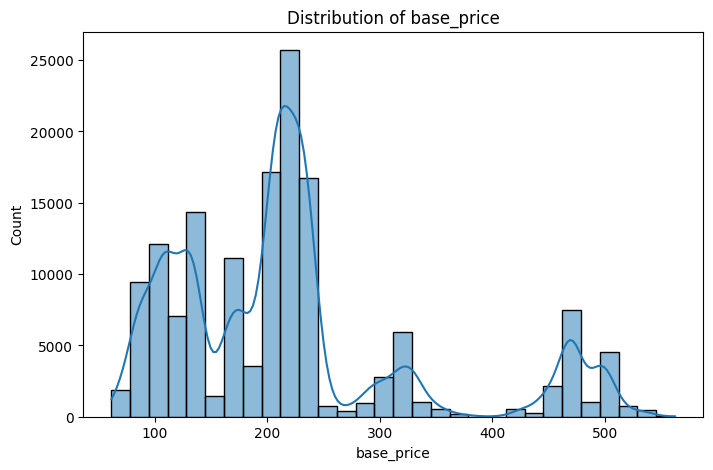

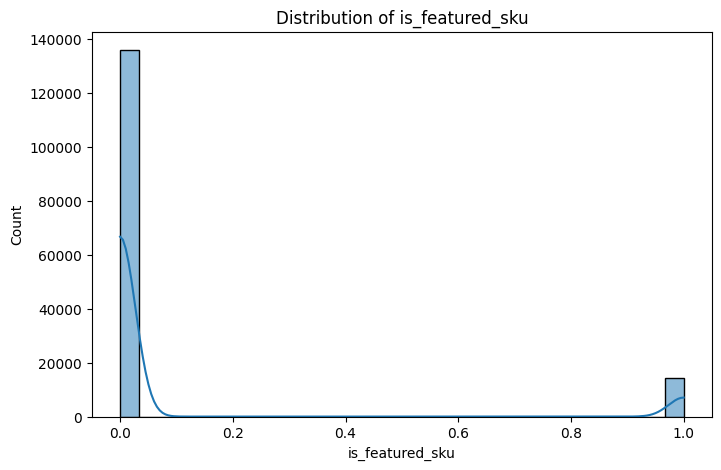

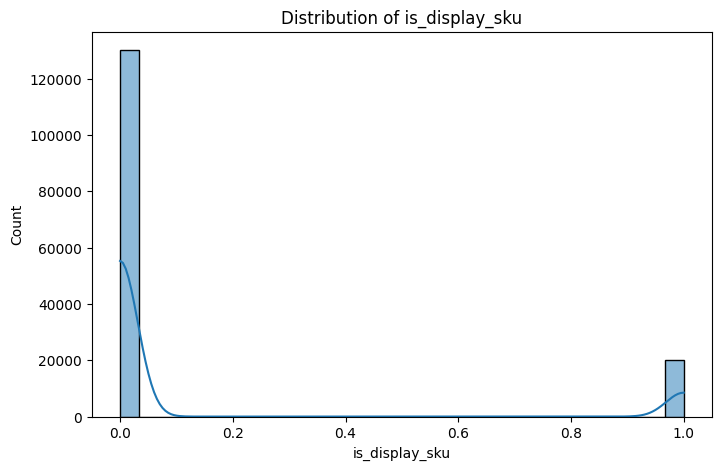

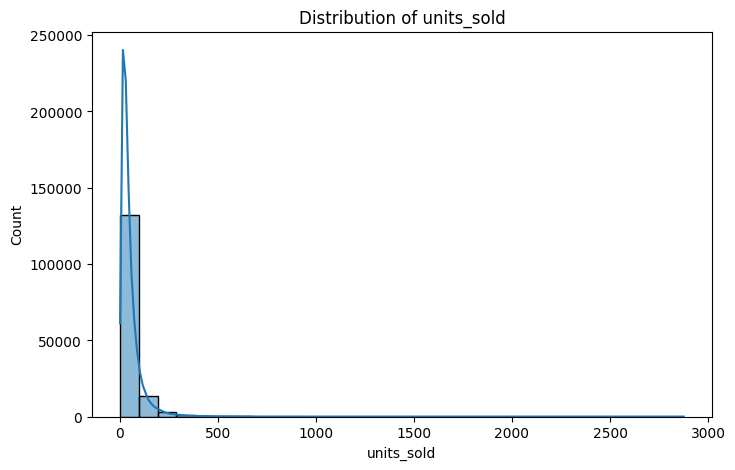

In [40]:
# Plot distributions only for numeric columns
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_train[col].dropna(), bins=30, kde=True)  # Drop NA to avoid errors
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

    # Save the plot
    plt.savefig(os.path.join(PLOTS_DIR, f"{col}_distribution.png"))

    plt.show()


In [42]:
# Drop non-numeric columns before selecting numeric ones
df_numeric = df_train.drop(columns=["week"], errors="ignore")


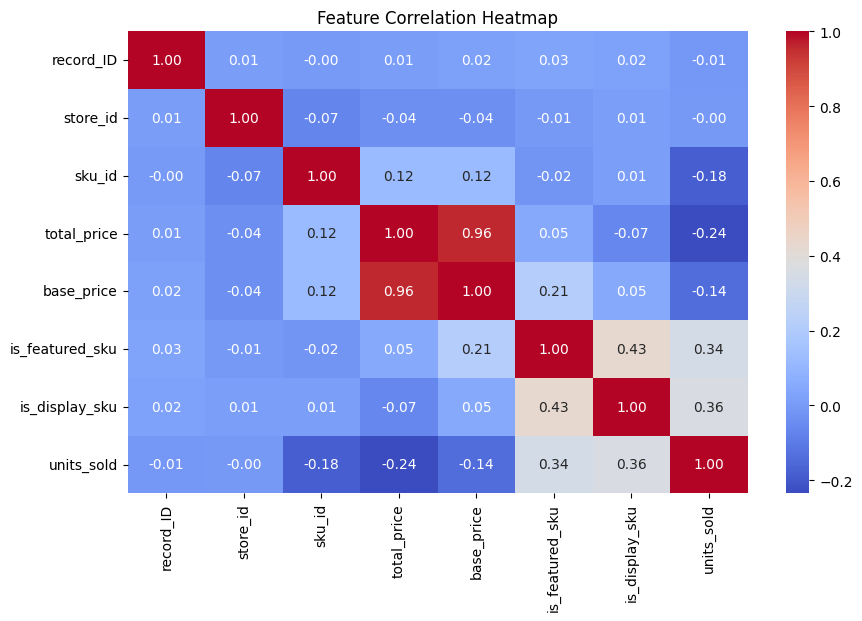

In [44]:
# 📉 Correlation Heatmap (Only for numerical columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")

# Save the heatmap
plt.savefig(os.path.join(PLOTS_DIR, "correlation_heatmap.png"))

plt.show()


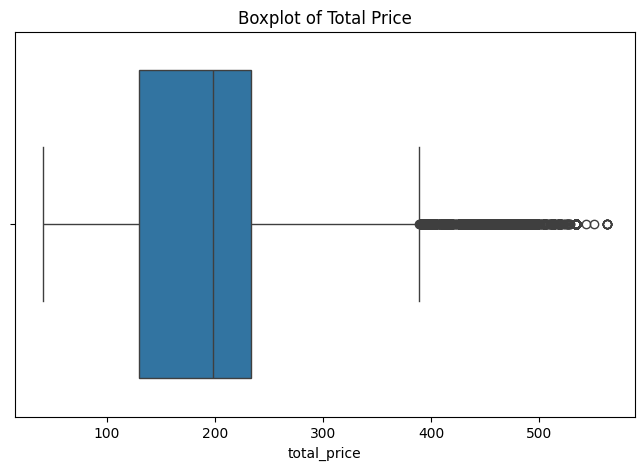

In [45]:
# Boxplot for Outliers (Total Price & Units Sold)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train["total_price"])
plt.title("Boxplot of Total Price")
plt.savefig(os.path.join(PLOTS_DIR, "total_price_boxplot.png"))
plt.show()


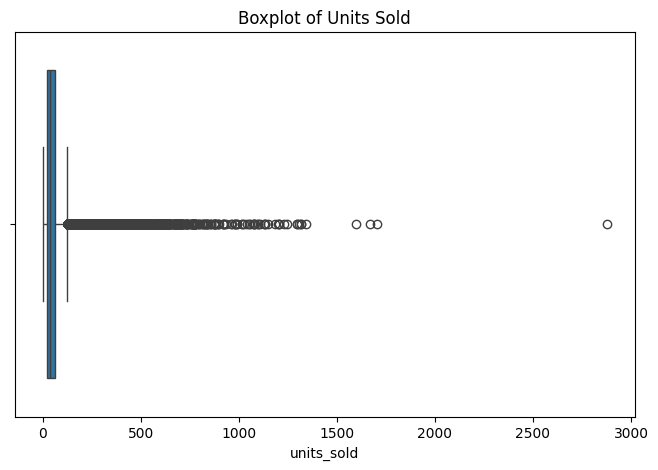

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train["units_sold"])
plt.title("Boxplot of Units Sold")
plt.savefig(os.path.join(PLOTS_DIR, "units_sold_boxplot.png"))
plt.show()


C:\Users\Himanshu\AppData\Local\Temp\ipykernel_32780\1867190146.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['week'] = pd.to_datetime(df_train['week'])
C:\Users\Himanshu\AppData\Local\Temp\ipykernel_32780\1867190146.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['week'] = pd.to_datetime(df_test['week'])


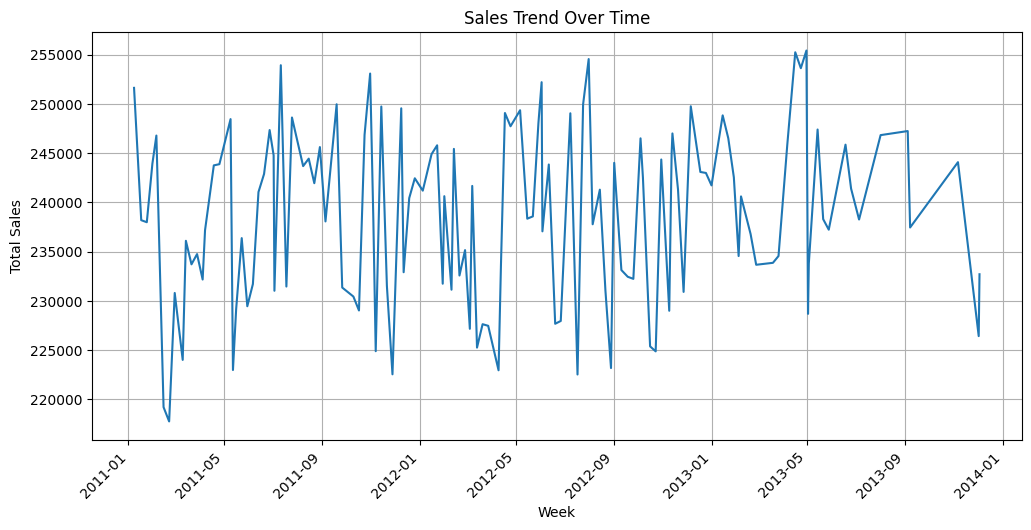

In [47]:
# Convert 'week' column to datetime format
df_train['week'] = pd.to_datetime(df_train['week'])
df_test['week'] = pd.to_datetime(df_test['week'])

# Sales Trend Over Time
plt.figure(figsize=(12, 6))
df_train.groupby('week')['total_price'].sum().plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid()

# Save the plot
plt.savefig(os.path.join(PLOTS_DIR, "sales_trend_over_time.png"))

plt.show()

In [48]:
df_train["total_price"].fillna(df_train["total_price"].median(), inplace=True)
print("\n Missing values fixed!")



 Missing values fixed!


C:\Users\Himanshu\AppData\Local\Temp\ipykernel_32780\135948690.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["total_price"].fillna(df_train["total_price"].median(), inplace=True)


In [49]:
df_train["week"] = pd.to_datetime(df_train["week"], errors="coerce")


In [50]:
print("\n🔍 Missing Dates after Conversion:")
print(df_train["week"].isnull().sum())



🔍 Missing Dates after Conversion:
0


In [52]:
print("\n Missing Dates after Conversion:")
print(df_train["week"].isnull().sum())



 Missing Dates after Conversion:
0


In [53]:
df_train["year"] = df_train["week"].dt.year
df_train["month"] = df_train["week"].dt.month
df_train["week_num"] = df_train["week"].dt.isocalendar().week


In [54]:
df_train[["week", "year", "month", "week_num"]].head()


,week,year,month,week_num
0,2011-01-17,2011,1,3
1,2011-01-17,2011,1,3
2,2011-01-17,2011,1,3
3,2011-01-17,2011,1,3
4,2011-01-17,2011,1,3


In [55]:
print(df_train.isnull().sum())


record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
year               0
month              0
week_num           0
dtype: int64


In [56]:
df_train["quarter"] = df_train["week"].dt.quarter
df_train["day_of_week"] = df_train["week"].dt.dayofweek  # Monday = 0, Sunday = 6


In [57]:
## Visualize Weekly & Monthly Sales Trends

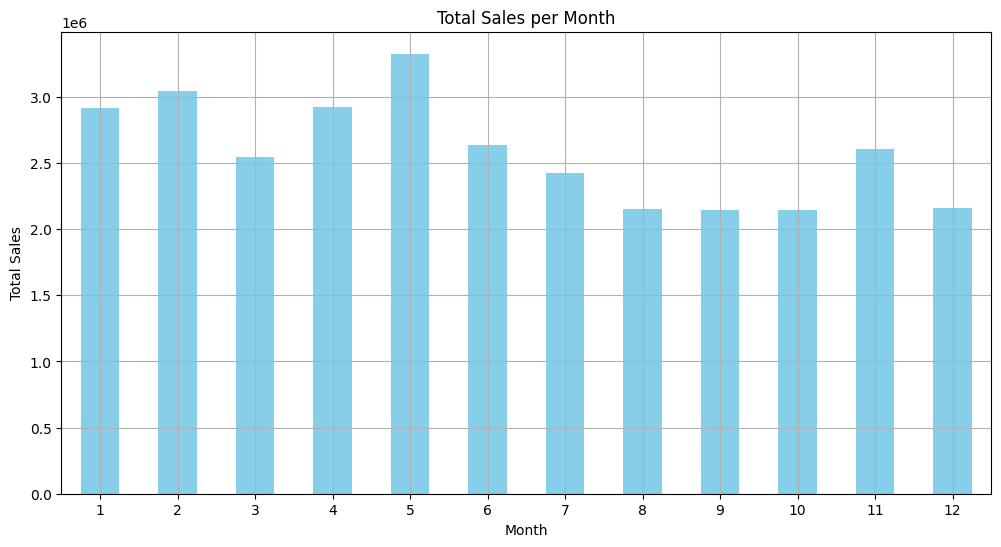

In [58]:
plt.figure(figsize=(12, 6))
df_train.groupby("month")["total_price"].sum().plot(kind="bar", color="skyblue")
plt.title("Total Sales per Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.grid()

plt.savefig(os.path.join(PLOTS_DIR, "monthly_sales.png"))
plt.show()


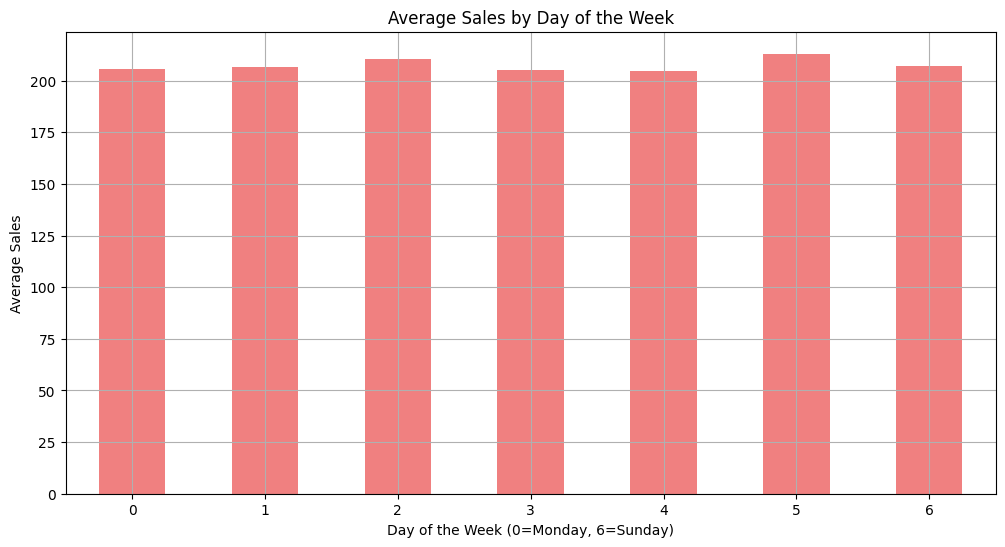

In [59]:
plt.figure(figsize=(12, 6))
df_train.groupby("day_of_week")["total_price"].mean().plot(kind="bar", color="lightcoral")
plt.title("Average Sales by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Sales")
plt.xticks(rotation=0)
plt.grid()

plt.savefig(os.path.join(PLOTS_DIR, "sales_by_day_of_week.png"))
plt.show()


In [60]:
## Handling Outliers in total_price & units_sold
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



In [61]:
df_train = remove_outliers(df_train, "total_price")
df_train = remove_outliers(df_train, "units_sold")


In [62]:
df_train.to_csv(os.path.join(DATA_DIR, "train_cleaned.csv"), index=False)
print("Cleaned dataset saved!")


Cleaned dataset saved!
